In [1]:
%pylab inline

import scipy as sp
import scipy.io 
import scipy.signal as signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import pylab as pl
from IPython import display    

def alphaFM(dataLengthSamples, sampleRate, alphaCenter, alphaModFreq, alphaFreqDev): # change to sample length instead of secs as input
    sampleSpacing = 1.0 / sampleRate
    dataLengthSecs = dataLengthSamples/sampleRate
    t = np.arange(0,dataLengthSecs,sampleSpacing)

    # signal to noise parameters
    snr = 5             # signal / noise # make these optional
    noiseMean = 0       # optional
    noiseStdDev = 0.5   # optional
    samplingNoiseAmp = 0.5 # optional
    alphaMean = 0       # optional
    alphaStdDev = abs(np.sqrt(snr*(noiseStdDev**2))) # std of sine wave
    alphaAmp = np.sqrt(2)*alphaStdDev
    h = alphaFreqDev/alphaModFreq         # Modulation index, tells you spread of sidebands < 1, narrowband, > 1 wideband

    # Constructs 1/f noise by taking CDF of normal dist.
    normalNoise = np.random.normal(noiseMean, noiseStdDev, (1,dataLengthSamples))
    pinkNoise = np.cumsum(normalNoise)
    
    # Frequency modulated alpha rhythm, a sinusoidal baseband signal
    alpha = alphaAmp*np.sin( alphaCenter  * 2.0 * np.pi * t + alphaFreqDev*np.sin(2 * np.pi * alphaModFreq * t) / alphaModFreq)

    # Alpha rhythm + 1/f noise + additional random noise
    voltageSamples = alpha + pinkNoise + samplingNoiseAmp*np.random.random([1,dataLengthSamples])    
    voltageSamples = np.reshape(voltageSamples, ((dataLengthSamples,)))
    
    return voltageSamples, alpha

# make another function that just generates a modulating alpha without noise
# make another function that just generates a non-modulating alpha with noise
# make another function that just geenrates a non-modulating alpha without noise

Populating the interactive namespace from numpy and matplotlib


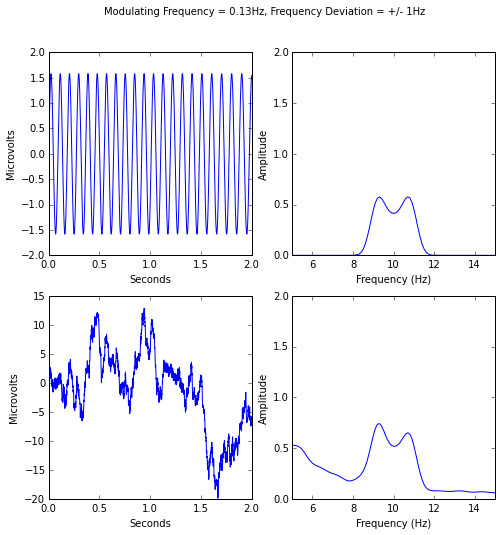

In [ ]:
dataLengthSecs = 120
sampleRate = 1024
sampleSpacing = 1.0 / sampleRate
alphaCenter = 10
dataLengthSamples = dataLengthSecs*sampleRate
desiredFreqResolution = 0.1 # Predefine resolution of spectrum
fftLengthSamples = int(sampleRate/desiredFreqResolution) # Depends on sample rate and desired resolution only
t = np.reshape(np.arange(0,dataLengthSecs,sampleSpacing), ((dataLengthSamples)))

alphaFreqDev = 1
modFreqStepSize = 0.01
maxModFreq = 2
#foldername = 'Dev_'+str(alphaFreqDev)+'Step_'+str(modFreqStepSize)

for (figIndex,alphaModFreq) in enumerate(np.arange(modFreqStepSize,maxModFreq,modFreqStepSize)):
    simulatedEEG, groundTruth = alphaFM(dataLengthSecs, sampleRate, alphaCenter, alphaModFreq, alphaFreqDev)

    fig1 = plt.figure(figsize=(8,8))
    title = 'Modulating Frequency = '+str(alphaModFreq)+'Hz, Frequency Deviation = +/- '+str(alphaFreqDev)+'Hz'
    
    plt.suptitle(title)
    
    plt.subplot(2,2,1)
    plt.plot(t[0:2*sampleRate],groundTruth[0:2*sampleRate])
    plt.ylabel('Microvolts')
    plt.xlabel('Seconds')

    plt.subplot(2,2,3)
    plt.plot(t[0:2*sampleRate],simulatedEEG[0:2*sampleRate])
    plt.ylabel('Microvolts')
    plt.xlabel('Seconds')

    plt.subplot(2,2,2)
    f,pspec = sp.signal.welch(groundTruth, fs=sampleRate, window='hanning', nperseg=2*sampleRate, noverlap=sampleRate/2, nfft=fftLengthSamples, detrend='linear', return_onesided=True, scaling='density')
    plt.plot(f,pspec)
    plt.xlim([5, 15])
    plt.ylim([0, 2])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency (Hz)')

    plt.subplot(2,2,4)
    f,pspec = sp.signal.welch(simulatedEEG, fs=sampleRate, window='hanning', nperseg=2*sampleRate, noverlap=sampleRate/2, nfft=fftLengthSamples, detrend='linear', return_onesided=True, scaling='density')
    plt.plot(f,pspec)
    plt.xlim([5, 15])
    plt.ylim([0, 2])
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency (Hz)')
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #fig1.savefig(str(figIndex).zfill(2)+'.jpg')
    time.sleep(0.1)
    
        